# Todo

* Curve fitting
* Replace NaNs
* Data compression/saving/organization
* Plate Reader - Data 

In [168]:
import numpy as np
import pandas as pd
%matplotlib inline

In [169]:
# Create some corrupted data
r = np.random.random((200, 8))

for i in range(8):
    corrupted_indices = np.random.randint(0, 200, 10)
    r[corrupted_indices, i] = np.nan

df = pd.DataFrame(r)

In [14]:
df.head()

,0,1,2,3,4,5,6,7
0,0.000574,0.091750,0.910506,0.309765,0.236114,0.004341,0.876232,0.670084
1,0.041048,0.466717,0.276980,0.280992,0.769767,0.171881,0.926828,0.626841
2,0.482860,0.050284,0.475676,0.952183,0.848089,0.236876,0.561879,0.834553
3,0.330183,NaN,0.382319,NaN,0.589831,0.671948,0.142383,0.573837
4,0.591043,0.487555,NaN,0.563286,0.941374,0.194890,0.151321,0.265802


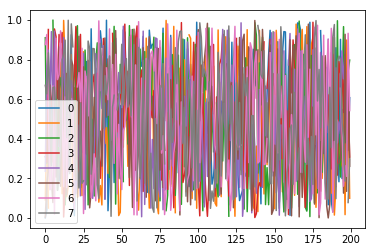

In [16]:
df.plot()

Use the mean to replace NaNs

In [20]:
print(df.head())

print(df.fillna(df.mean()).head())
# print(df.fillna(0).head()) # replace NaN with 0
# print(df.fillna(df.median()).head()) # replace NaN with median


          0         1         2         3         4         5         6  \
0  0.000574  0.091750  0.910506  0.309765  0.236114  0.004341  0.876232   
1  0.041048  0.466717  0.276980  0.280992  0.769767  0.171881  0.926828   
2  0.482860  0.050284  0.475676  0.952183  0.848089  0.236876  0.561879   
3  0.330183       NaN  0.382319       NaN  0.589831  0.671948  0.142383   
4  0.591043  0.487555       NaN  0.563286  0.941374  0.194890  0.151321   

          7  
0  0.670084  
1  0.626841  
2  0.834553  
3  0.573837  
4  0.265802  
          0         1         2         3         4         5         6  \
0  0.000574  0.091750  0.910506  0.309765  0.236114  0.004341  0.876232   
1  0.041048  0.466717  0.276980  0.280992  0.769767  0.171881  0.926828   
2  0.482860  0.050284  0.475676  0.952183  0.848089  0.236876  0.561879   
3  0.330183  0.473414  0.382319  0.523377  0.589831  0.671948  0.142383   
4  0.591043  0.487555  0.505495  0.563286  0.941374  0.194890  0.151321   

          7  


Use interpolation to replace NaNs in your data

In [24]:
df.interpolate().head()

,0,1,2,3,4,5,6,7
0,0.000574,0.091750,0.910506,0.309765,0.236114,0.004341,0.876232,0.670084
1,0.041048,0.466717,0.276980,0.280992,0.769767,0.171881,0.926828,0.626841
2,0.482860,0.050284,0.475676,0.952183,0.848089,0.236876,0.561879,0.834553
3,0.330183,0.268920,0.382319,0.757735,0.589831,0.671948,0.142383,0.573837
4,0.591043,0.487555,0.690460,0.563286,0.941374,0.194890,0.151321,0.265802


In [26]:
(0.050284+0.487555)/2

0.26891950000000003

# Data compression

In [27]:
import flammkuchen as fl
from nutil.image import browse

In [32]:
data = (np.random.random((12, 512, 512, 3))*255).astype(np.uint8)

In [35]:
browse(data, resize=.25)

interactive(children=(IntSlider(value=5, description='a', max=11), Output()), _dom_classes=('widget-interact',))

In [45]:
fl.save("random_noise.h5", 
        dict(stack=data), 
        compression='blosc')

C:\Users\me\Anaconda3\lib\site-packages\flammkuchen\hdf5io.py:107: UserWarning: (flammkuchen.save) Missing compression method lzip: no compression will be used.
  "no compression will be used.").format(compression))


# Curve fitting

In [144]:
import matplotlib.pyplot as plt
%matplotlib inline

Dummy data that has a linear correlation

In [157]:
x = np.arange(100)
y = 5 * x + 2 + np.random.randn(100)*70

Text(0,0.5,'outcome')

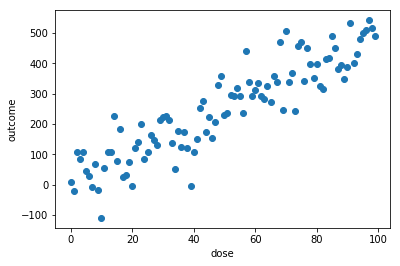

In [158]:
plt.plot(x, y, 'o')
plt.xlabel("dose")
plt.ylabel("outcome")

Define your linear function

In [159]:
def lin(x, a, b):
    return a*x + b

Load the optimizer

In [160]:
from scipy.optimize import curve_fit

Do curve fitting, retrieve the parameters you want to find, here ```a``` and ```b```

In [161]:
a, b = curve_fit(lin, x, y)[0]

Compute the estimation 

In [162]:
y_est = lin(x, a, b)

Text(0,0.5,'outcome')

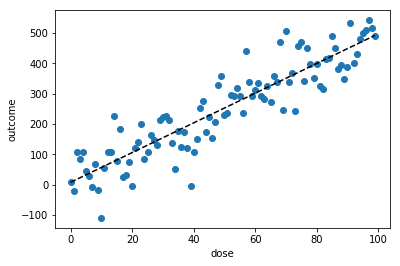

In [163]:
plt.plot(x, y, 'o') # Data
plt.plot(x, y_est, 'k--') # Line
plt.xlabel("dose")
plt.ylabel("outcome")


Use a different package to do the same task

In [164]:
from sklearn.linear_model import LinearRegression

In [165]:
lr = LinearRegression()
lr.fit(x[:, None], y[:, None])

LinearRegression()

In [166]:
lr.coef_, lr.intercept_, a, b

(array([[4.89995341]]),
 array([7.51551031]),
 4.899953389355417,
 7.515511866926416)

# Sigmoid

Again, I create some dummy data to test the sigmoid fitting algorithm

In [74]:
y = np.random.randn(500)

In [81]:
hist, bins = np.histogram(y, bins=30)

<Container object of 30 artists>

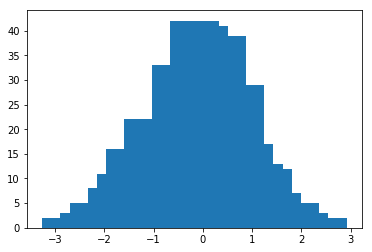

In [85]:
plt.bar(bins[:-1], hist)

In [93]:
to_fit = hist.cumsum()+np.random.random(30)*100
to_fit = to_fit/np.max(to_fit)

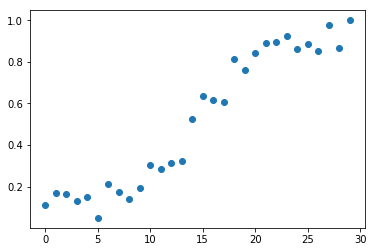

In [94]:
plt.plot(to_fit, 'o')

$$ sigm(x,a,b) = \frac{1}{1+e^{-a \cdot x  + b}} $$

In [129]:
def sigm(x, a, b):
    return 1 / (1 + np.exp(-a * x + b))

Try to fit sigmoid

In [133]:
a, b = curve_fit(sigm, np.arange(30), to_fit)[0]

In [134]:
x = np.arange(30)
y_est = sigm(x, a, b)

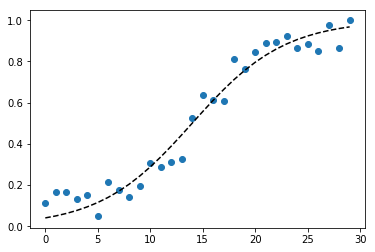

In [135]:
plt.plot(to_fit, 'o')
plt.plot(y_est, 'k--')

Does it fail? Then use some initial guess to help the optimization algorithm...

In [136]:
from ipywidgets import interact

In [137]:
@interact
def plotSigm(a:(0, 10, .1)=0.4, b:(0, 10, .5)=6.):
    plt.plot(x, to_fit, 'o')
    plt.plot(x, sigm(x, a, b))

interactive(children=(FloatSlider(value=0.4, description='a', max=10.0), FloatSlider(value=6.0, description='b', max=10.0, step=0.5), Output()), _dom_classes=('widget-interact',))

In [138]:
a, b = curve_fit(sigm, np.arange(30), to_fit, p0=[.4, 6.])[0]

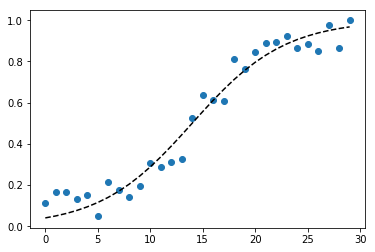

In [139]:
plt.plot(to_fit, 'o')
plt.plot(y_est, 'k--')